# GIS Visualization Homework 1

## Homework1(1). Line segment length algorithm

In [19]:
# My access token for Mapbox
token ='pk.eyJ1IjoiMzA1NzU4MDI2OCIsImEiOiJja3R3dTU4Ym8ybmoyMnhwbWZ1ZnZ5c3BwIn0.n0dPOKbtOpE-QP3XZhgzSQ'

import os
import pandas as pd
import json
from typing import Union
from mapboxgl.viz import *
from mapboxgl.utils import *
# python geoprocessing package
from shapely.geometry import LineString
# My function package
from Function import *
# For mathematical calculation
import math
import geopandas

In [20]:
# Line=[[80, 50], [150, 30]]
# list2geojson("Data/MapLine.geojson",[LineString(Line)], [500],[5])
'''
list2geojson(write_geojson_path,lst,*others)
:param write_geojson_path: geojson file path to write
:param lst:List to be converted
:param others:Additional information. 'sample' and 'weight' for particular.
'''
def CalculateLength(Polyline):
    '''
    Calculate the length of the line segment
    :param Polyline: List type，[[x1,y1],[x2,y2],...]
    :return: Returns the length of a numeric line segment
    '''
    dis=0
    for i in range(len(Polyline)-1):
        dis+=math.sqrt((Polyline[i+1][0]-Polyline[i][0])*(Polyline[i+1][0]-Polyline[i][0])+(Polyline[i+1][1]-Polyline[i][1])*(Polyline[i+1][1]-Polyline[i][1]))
    return dis

# Test the function
# print('Calculated length of the line segment: ',CalculateLength(Line))

# Call the function package to execute
data=geopandas.read_file('Data/MapLine.geojson')
print('Length of the line segment:',data.geometry[0].length)

# If the range of the line segment is within geographic coordinates, display it on the map
OnMap=False
Line=data.geometry[0].coords
for i in range (len(Line)):
    if (Line[i][0]<180 or Line[i][0]>-180) and (Line[i][1]<90 or Line[i][1]>-90):
        OnMap=True
        
# Draw on the map to present the line
if OnMap:
    print('\nBecause the range of the line segment is within geographic coordinates, present it on the map:')
    # make viz with GeoJSON source. others_0 stands for 'sample', others_1 stands for 'weight'
    viz = LinestringViz('/files/Data/MapLine.geojson', 
                        access_token=token,
                        color_property='others_0',
                        color_stops=create_color_stops([0, 50, 100, 500, 1500], colors='Blues'),
                        line_width_property='others_1',
                        line_width_stops=create_numeric_stops([0, 1, 2, 3, 4, 5], 0, 10),
                        # 
                        width='610px', 
                        opacity=0.8,
                        center=(-122.48, 37.83),
                        zoom=13,
                        below_layer='waterway-label')
    viz.show()

Length of the line segment: 0.018435172501924724

Because the range of the line segment is within geographic coordinates, present it on the map:


## Homework1(2). Statistical Charts

#### 1) Scatter Chart

In [21]:
from pyecharts import options as opts
from pyecharts.charts import *
from pyecharts.globals import ThemeType,SymbolType
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker
import random
'''
Raw Data: [x,y] for every point. Using Faker to generate.
Statistics: Maximum, Minimum and Average.
'''
# Since statistical calculations are very basic, I think there should be no need to use raw code to calculate.
(
    # Set width for convenience of printing.
    EffectScatter(init_opts=opts.InitOpts(width="610px"))
    # Generate random points.
    .add_xaxis(Faker.week_en)
    .add_yaxis("", Faker.values(), symbol=SymbolType.ARROW)
    # Setting title.
    .set_global_opts(title_opts=opts.TitleOpts(title="EffectScatter-Symbol"))
    # Setting markline for statistics.
    .set_series_opts(
         markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="min", name="Minimum"),
                opts.MarkLineItem(type_="max", name="Maximum"),
                opts.MarkLineItem(type_="average", name="Average"),
            ]
        ))
    .render_notebook()
)

#### 2) Professional Scatter

In [22]:
'''
Raw Data: ["Income","Life Expectancy","Population","Country","Year"]
'''
# Loading data from json file.
with open("Data/life-expectancy-table.json", "r", encoding="utf-8") as f:
    j = json.load(f)

# The first segment, represents the relationship between income and life expectancy
l1_1 = (
    Scatter()
    .add_dataset(
        dimensions=[
            "Income",
            "Life Expectancy",
            "Population",
            "Country",
            # Using ordinal type instead of numerical to represent year.
            {"name": "Year", "type": "ordinal"},
        ],
        source=j,
    )
    .add_yaxis(
        series_name="",
        y_axis=[],
        symbol_size=2.5,
        # For grid index.
        xaxis_index=0,
        yaxis_index=0,
        # Tooltip means to display when the mouse is hovering.
        encode={"x": "Income", "y": "Life Expectancy", "tooltip": [0, 1, 2, 3, 4]},
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value",
            # Grid index.
            grid_index=0,
            name="Income",
            # Rotate xaxis label.
            axislabel_opts=opts.LabelOpts(rotate=50, interval=0),
        ),
        yaxis_opts=opts.AxisOpts(type_="value", grid_index=0, name="Life Expectancy"),
        title_opts=opts.TitleOpts(title="Encode and Matrix"),
    )
)

# The second segment, represents the relationship between Country and Income
l1_2 = (
    Scatter()
    .add_dataset()
    .add_yaxis(
        series_name="",
        y_axis=[],
        symbol_size=2.5,
        xaxis_index=1,
        yaxis_index=1,
        encode={"x": "Country", "y": "Income", "tooltip": [0, 1, 2, 3, 4]},
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="category",
            grid_index=1,
            name="Country",
            boundary_gap=False,
            axislabel_opts=opts.LabelOpts(rotate=50, interval=0),
        ),
        yaxis_opts=opts.AxisOpts(type_="value", grid_index=1, name="Income"),
    )
)

# The third segment, represents the relationship between Income and Population
l2_1 = (
    Scatter()
    .add_dataset()
    .add_yaxis(
        series_name="",
        y_axis=[],
        symbol_size=2.5,
        xaxis_index=2,
        yaxis_index=2,
        encode={"x": "Income", "y": "Population", "tooltip": [0, 1, 2, 3, 4]},
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value",
            grid_index=2,
            name="Income",
            axislabel_opts=opts.LabelOpts(rotate=50, interval=0),
        ),
        yaxis_opts=opts.AxisOpts(type_="value", grid_index=2, name="Population"),
    )
)

# The fourth segment, represents the relationship between Life Expectancy and Population
l2_2 = (
    Scatter()
    .add_dataset()
    .add_yaxis(
        series_name="",
        y_axis=[],
        symbol_size=2.5,
        xaxis_index=3,
        yaxis_index=3,
        encode={"x": "Life Expectancy", "y": "Population", "tooltip": [0, 1, 2, 3, 4]},
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value",
            grid_index=3,
            name="Life Expectancy",
            axislabel_opts=opts.LabelOpts(rotate=50, interval=0),
        ),
        yaxis_opts=opts.AxisOpts(type_="value", grid_index=3, name="Population"),
    )
)
# Use the grid component to render four scatter plots at the same time
(
    Grid(init_opts=opts.InitOpts(width="610px", height="2200px"))
    .add(
        chart=l1_1,
        # Percentage distance from the four sides
        grid_opts=opts.GridOpts(pos_right="10%", pos_bottom="76%"),
        grid_index=0,
    )
    .add(
        chart=l1_2,
        grid_opts=opts.GridOpts(pos_right="10%", pos_bottom="53%", pos_top="28%"),
        grid_index=1,
    )
    .add(
        chart=l2_1,
        grid_opts=opts.GridOpts(pos_right="10%", pos_bottom="27%", pos_top="53%"),
        grid_index=2,
    )
    .add(
        chart=l2_2, grid_opts=opts.GridOpts(pos_right="10%", pos_bottom="3%", pos_top="78%"), grid_index=3
    )
    .render_notebook()
)


#### 3) Line Chart

In [23]:
'''
Raw Data: [x,y1,y2] for every point. Represents the highest and lowest temperature in a week.
Statistics: Maximum, Minimum and Average.
'''
week_name_list = Faker.week_en
high_temperature = [11, 11, 15, 13, 12, 13, 10]
low_temperature = [1, -2, 2, 5, 3, 2, 0]

(
    # Set width for convenience of printing.
    Line(init_opts=opts.InitOpts(width="610px"))
    # Add point data.
    .add_xaxis(xaxis_data=week_name_list)
    # Highest temperature data.
    .add_yaxis(
        series_name="Highest Temperature",
        y_axis=high_temperature,
        # Markpoint for Maximum and minimum.
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="Maximum"),
                opts.MarkPointItem(type_="min", name="Minimum"),
            ]
        ),
        # Markline for average.
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(type_="average", name="Average")]
        ),
    )
    # Lowest temperature data.
    .add_yaxis(
        series_name="Lowest Temperature",
        y_axis=low_temperature,
        # Markpoint for Maximum and minimum.
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="Maximum"),
                opts.MarkPointItem(type_="min", name="Minimum")
            ]
        ),
        # Markline for average.
        markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="average", name="Average")
            ]
        ),
    )
    # Snap the initial value to the y axis.
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
    .render_notebook()
)


#### 4) Bar Chart

In [24]:
'''
Raw Data: [x,y1,y2] for every point. Represents the ratio of two items.
Statistics: Average.
'''
# Set background style.
background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)

# Data 
list2 = [    {"value": 12, "percent": 12 / (12 + 3)},
    {"value": 23, "percent": 23 / (23 + 21)},
    {"value": 33, "percent": 33 / (33 + 5)},
    {"value": 3, "percent": 3 / (3 + 52)},
    {"value": 33, "percent": 33 / (33 + 43)},
]
list3 = [
    {"value": 3, "percent": 3 / (12 + 3)},
    {"value": 21, "percent": 21 / (23 + 21)},
    {"value": 5, "percent": 5 / (33 + 5)},
    {"value": 52, "percent": 52 / (3 + 52)},
    {"value": 43, "percent": 43 / (33 + 43)},
]

# Initiate with fixed width and color scheme.
Stackbar=Bar(init_opts=opts.InitOpts(width='610px',bg_color=JsCode(background_color_js)))

# Add xaxis and double yaxis. Category_gap for the width of the bar.
Stackbar.add_xaxis([1, 2, 3, 4, 5])
Stackbar.add_yaxis("product1", list2, stack="stack1", category_gap="50%",color='#DDF0FF',
            markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="average", name="Average")
            ]
        ),)
Stackbar.add_yaxis("product2", list3, stack="stack1", category_gap="50%",color='white',
            markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="average", name="Average")
            ]
        ),)

# Options for label position and string formmat.
Stackbar.set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        )
    )

# Options for title and the style of axie.
Stackbar.set_global_opts(
        title_opts=opts.TitleOpts(
            title="OCTOBER 2015",
            pos_bottom="5%",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=16),
        ),
        xaxis_opts=opts.AxisOpts(
            # Margin for the offset from xaxis.
            axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63"),
            # Hide the original xaxis.
            axisline_opts=opts.AxisLineOpts(is_show=False),
            # Set the tick style.
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=25,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            # Set the grid style.
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            # Label style.
            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
            # Line style.
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
            ),
            # Tick style.
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=15,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            # Grid style.
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
            
        ),
        # Hide the label.
        legend_opts=opts.LegendOpts(is_show=False),
)
# Present on notebook
Stackbar.render_notebook()

#### 5) 3D Bar Chart

In [25]:
'''
Raw Data: [x,y,z] for every point. Respectively represent hour, week, and value.
'''
# Clear dataset
data=[]

# Generate random data
for i in range(24):
    for j in range(7):
        t=random.randint(0,15)
        data.append([i,j,t])
        
# Render the graph directly
(Bar3D(init_opts=opts.InitOpts(width='610px'))
    .add(
        series_name='',
        data=data,
        # Using faker go generate label.
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=Faker.clock),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=Faker.week_en),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    )
    .set_global_opts(
        # Setting color bar.
        visualmap_opts=opts.VisualMapOpts(
            max_=20,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    ).render_notebook()
)     

#### 6) Pie Chart

In [26]:
'''
Raw Data: [x,y] for every segment.
Statistics: Maximum, Minimum.
'''
x_data = Faker.country
y_data = Faker.values()

# Rank the content.
data_pair = [list(z) for z in zip(x_data, y_data)]
data_pair.sort(key=lambda x: x[1])

(
    # Initiate settings.
    Pie(init_opts=opts.InitOpts(width="610px",bg_color="#2c343c"))
    # Add data.
    .add(
        series_name="Country",
        data_pair=data_pair,
        rosetype="radius",
        # Zoom chart
        radius="55%",
    )
    # Set title and legend.
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Customized Pie",
            pos_left="center",
            pos_top="20",
            title_textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    # Set mouse hover operation.
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),
        label_opts=opts.LabelOpts(color="rgba(255, 255, 255, 0.3)"),
    )
    .render_notebook()
)

#### 7) Mixed Chart

In [27]:
'''
Raw Data: [x,y1,y2] for bar chart, [x,y] for map.
'''
# Using faker to generate bar
bar = (
    Bar()
    .add_xaxis(Faker.country)
    .add_yaxis("A", Faker.values())
    .add_yaxis("B", Faker.values())
    .set_global_opts(legend_opts=opts.LegendOpts(pos_left="20%"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)

# Initiate map
geo = (
    Geo()
    .add_schema(maptype="china")
    .add("geo", [list(z) for z in zip(Faker.provinces, Faker.values())])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="Grid-Geo-Bar"),
    )
)
# Connect above two graphs
(
    Grid(init_opts=opts.InitOpts(width='610px'))
    .add(bar, grid_opts=opts.GridOpts(pos_top="50%", pos_right="75%"))
    .add(geo, grid_opts=opts.GridOpts(pos_left="60%"))
    .render_notebook()
)


#### 8) Dynamic Timeline  Chart

In [28]:
'''
Raw Data: ["country","gdp","Primary industry","Secondary industry","Tertiary Industry","Estate","Finance"]
'''
total_data={}
# Using Faker to generate data
name_list=Faker.country
data_gdp={}
data_pi={}
data_si={}
data_ti={}
data_estate={}
data_financial={}
for year in range(2002, 2012):
    data_gdp[year]=Faker.values()
    data_pi[year]=Faker.values()
    data_si[year]=Faker.values()
    data_ti[year]=Faker.values()
    data_estate[year]=Faker.values()
    data_financial[year]=Faker.values()

# Format data function
def format_data(data: dict) -> dict:
    for year in range(2002, 2012):
        max_data, sum_data = 0, 0
        temp = data[year]
        max_data = max(temp)
        for i in range(len(temp)):
            sum_data += temp[i]
            data[year][i] = {"name": name_list[i], "value": temp[i]}
        data[str(year) + "max"] = int(max_data / 100) * 100
        data[str(year) + "sum"] = sum_data
    return data

# GDP
total_data["dataGDP"] = format_data(data=data_gdp)
# Primary industry
total_data["dataPI"] = format_data(data=data_pi)
# Secondary industry
total_data["dataSI"] = format_data(data=data_si)
# Tertiary Industry
total_data["dataTI"] = format_data(data=data_ti)
# Estate
total_data["dataEstate"] = format_data(data=data_estate)
# Finance
total_data["dataFinancial"] = format_data(data=data_financial)

#####################################################################################
# 2002 - 2011 years' data
def get_year_overlap_chart(year: int) -> Bar:
    bar = (
        Bar()
        .add_xaxis(name_list)
        .add_yaxis("GDP",total_data["dataGDP"][year])
        .add_yaxis(
            "Finance",
            total_data["dataFinancial"][year]
        )
        .add_yaxis(
            "Estate",
            total_data["dataEstate"][year]
        )
        .add_yaxis(
            "Primary industry",
            total_data["dataPI"][year]
        )
        .add_yaxis(
           "Secondary industry",
            total_data["dataSI"][year]
        )
        .add_yaxis(
            "Tertiary Industry",
            total_data["dataTI"][year]
        )
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False)
        )
        .set_global_opts(            
            title_opts=opts.TitleOpts(
                title="{}".format(year)
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True, trigger="axis", axis_pointer_type="shadow"
            ),
        )
    )
    pie = (
        Pie()
        .add(
            series_name="GDP_Percent",
            data_pair=[
                ["Primary industry", total_data["dataPI"]["{}sum".format(year)]],
                ["Secondary industry", total_data["dataSI"]["{}sum".format(year)]],
                ["Tertiary Industry", total_data["dataTI"]["{}sum".format(year)]],
            ],
            center=["75%", "35%"],
            radius="28%",
        )
        .set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="item"))
    )
    return bar.overlap(pie)


# Graph to generate timeline
timeline = Timeline(init_opts=opts.InitOpts(width="610px", height="500px"))

# Add data to timeline
for y in range(2002, 2012):
    timeline.add(get_year_overlap_chart(year=y), time_point=str(y))

# Autoplay Setting
timeline.add_schema(is_auto_play=True, play_interval=1000)

# Present on notebook
timeline.render_notebook()

#### 9) Parallel Chart

In [29]:
'''
Raw Data: ["data","AQI","PM2.5","PM10","CO","NO2","CO2"]
'''
# Generte Fake values
data=[]
for i in range(14):
    data.append(Faker.values()+['Light pollution'])
(
    Parallel(init_opts=opts.InitOpts(width='610px'))
    .add_schema(
        [
            opts.ParallelAxisOpts(dim=0, name="data"),
            opts.ParallelAxisOpts(dim=1, name="AQI"),
            opts.ParallelAxisOpts(dim=2, name="PM2.5"),
            opts.ParallelAxisOpts(dim=3, name="PM10"),
            opts.ParallelAxisOpts(dim=4, name="CO"),
            opts.ParallelAxisOpts(dim=5, name="NO2"),
            opts.ParallelAxisOpts(dim=6, name="CO2"),
            opts.ParallelAxisOpts(
                dim=7,
                name="level",
                type_="category",
                data=["excellent", "good", "Light pollution", 
                      "Moderately polluted", "Heavy pollution", "Serious pollution"],
            ),
        ]
    )
    .add("parallel", data)
    .set_global_opts(title_opts=opts.TitleOpts(title="Parallel-Category"))
    .render_notebook()
)

## Homework1(3). Advanced Features

#### 1) Draw a map

###### Create a map with raster tiles from OpenStreetMap.org

In [30]:
tiles_url = 'https://a.tile.openstreetmap.org/{z}/{x}/{y}.png'

# Create an empty style
style = {'version': 8, 'sources': {}, 'layers': []}

viz = RasterTilesViz(tiles_url, 
                     access_token=token,
                     tiles_size=256,
                     height='500px', 
                     # 
                     width='610px', 
                     zoom=2, 
                     style=style)
viz.show()


###### Update scale to match Mapbox Dark-v9 style

In [31]:
viz = LinestringViz('/files/MapLine.geojson', 
                        access_token=token,
                        color_property='others_0',
                        color_stops=create_color_stops([0, 50, 100, 500, 1500], colors='Blues'),
                        line_width_property='others_1',
                        line_width_stops=create_numeric_stops([0, 1, 2, 3, 4, 5], 0, 10),
                        opacity=0.8,
                        center=(117, 40),
                        # 
                        width='610px', 
                        zoom=3,
                        below_layer='waterway-label')
    
# Map settings
viz.style='mapbox://styles/mapbox/dark-v9?optimize=true'
viz.height = '500px'

# Legend settings
viz.legend_gradient = False
viz.legend_fill = '#343332'
viz.legend_header_fill = '#343332'
viz.legend_text_color = 'hsl(0, 0%, 70%)'
viz.legend_key_borders_on = False
viz.legend_title_halo_color = 'hsla(0, 0%, 10%, 0.75)'

# Render map
viz.show()

#### 2) Gray map tracking contour

###### Plot the average precipitation contour

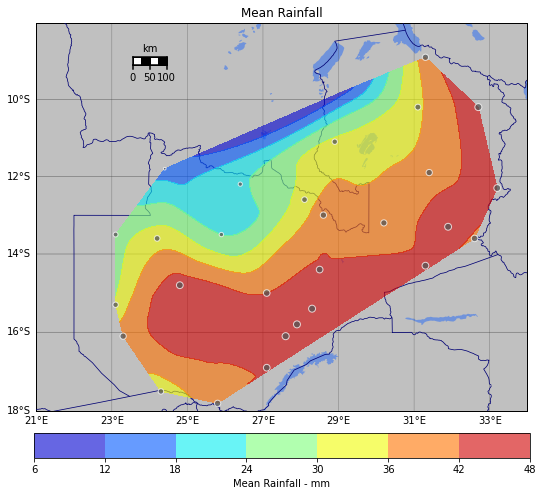

In [32]:
import numpy as np
import pandas as pd
# from matplotlib.mlab import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import griddata as gd

# Set up a basic picture drawing board
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, fc='w', frame_on=False)

# Extract data
data = pd.read_csv('Data/datam.txt', delim_whitespace=True)
norm = Normalize()

#Set the map boundary value
lllon = 21
lllat = -18
urlon = 34
urlat = -8

#Initialize the map
m = Basemap(
    projection = 'merc',
    llcrnrlon = lllon, llcrnrlat = lllat, urcrnrlon = urlon, urcrnrlat = urlat,
    resolution='h')

# Convert latitude and longitude points to map mapping points
data['projected_lon'], data['projected_lat'] = m(*(data.Lon.values, data.Lat.values))

# Generate raster data of latitude and longitude
numcols, numrows = 1000, 1000
xi = np.linspace(data['projected_lon'].min(), data['projected_lon'].max(), numcols)
yi = np.linspace(data['projected_lat'].min(), data['projected_lat'].max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# Interpolation
x, y, z = data['projected_lon'].values, data['projected_lat'].values, data.Z.values
zi = gd(
    (data[['projected_lon', 'projected_lat']]),
    data.Z.values,
    (xi, yi),
    method='cubic')

# Set map details
m.drawmapboundary(fill_color = 'white')
m.fillcontinents(color='#C0C0C0', lake_color='#7093DB')
m.drawcountries(
    linewidth=.75, linestyle='solid', color='#000073',
    antialiased=True,
    ax=ax, zorder=3)

m.drawparallels(
    np.arange(lllat, urlat, 2.),
    color = 'black', linewidth = 0.5,
    labels=[True, False, False, False])
m.drawmeridians(
    np.arange(lllon, urlon, 2.),
    color = '0.25', linewidth = 0.5,
    labels=[False, False, False, True])

# Isosurface drawing
con = m.contourf(xi, yi, zi, zorder=4, alpha=0.6, cmap='jet')
# Insert survey point
m.scatter(
    data['projected_lon'],
    data['projected_lat'],
    color='#545454',
    edgecolor='#ffffff',
    alpha=.75,
    s=50 * norm(data['Z']),
    cmap='jet',
    ax=ax,
    vmin=zi.min(), vmax=zi.max(), zorder=4)

# Insert color label, name and range
cbar = plt.colorbar(con,orientation='horizontal', fraction=.057, pad=0.05)
cbar.set_label("Mean Rainfall - mm")

m.drawmapscale(
    24., -9., 28., -13,
    100,
    units='km', fontsize=10,
    yoffset=None,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000',
    zorder=5)

plt.title("Mean Rainfall")
plt.show()

###### Contour drawing in mapbox

In [33]:
# JSON join-data object
data = [{"elevation": x} for x in range(0, 21000, 10)]
viz = LinestringViz(data, 
                    access_token=token,
                    vector_url='mapbox://mapbox.mapbox-terrain-v2',
                    vector_layer_name='contour',
                    vector_join_property='ele',
                    data_join_property='elevation',
                    color_property='elevation',
                    color_stops=create_color_stops([0, 50, 100, 200, 300], colors='YlOrRd'),
                    line_width_stops=create_numeric_stops([0, 50, 100, 200, 300], 0.1, 4),
                    line_width_property='elevation',
                    line_width_function_type='interpolate',
                    line_width_default='1',
                    # 
                    width='610px',
                    opacity=0.8,
                    center=(-122.48, 37.83),
                    zoom=13,
                    below_layer='waterway-label')
viz.show()

d:\cty\mypython\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### 3) 3D isosurface rendering

In [34]:
def float_range(start: int, end: int, step: Union[int, float], round_number: int = 2):
    """
    Floating point range
    :param start: Starting value
    :param end: End value
    :param step: Step size
    :param round_number: Precision
    :return: list type
    """
    temp = []
    while True:
        if start < end:
            temp.append(round(start, round_number))
            start += step
        else:
            break
    return temp


def surface3d_data():
    for t0 in float_range(-3, 3, 0.05):
        y = t0
        for t1 in float_range(-3, 3, 0.05):
            x = t1
            z = math.sin(x ** 2 + y ** 2) * x / 3.14
            yield [x, y, z]

#  config
(
    Scatter3D(
        init_opts=opts.InitOpts(width="610px")
    )  # bg_color="black"
    .add(
        series_name="",
        data=list(surface3d_data()),       
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
    )
    .set_global_opts(
        visualmap_opts=[
            opts.VisualMapOpts(
            dimension=2,
            max_=1,
            min_=-1,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        ),
        opts.VisualMapOpts(
                type_="size",
                pos_bottom="100",
                range_size=3,
               is_show=False
            ),  
            
        ]
        
    )
    .render_notebook()
)

In [35]:
(
    Surface3D(init_opts=opts.InitOpts(width="610px"))
    .add(
        series_name="",
        shading="color",
        data=list(surface3d_data()),
        xaxis3d_opts=opts.Axis3DOpts(type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(type_="value"),
        grid3d_opts=opts.Grid3DOpts(width=100, height=40, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            dimension=2,
            max_=1,
            min_=-1,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render_notebook()
)
